Лабораторна робота №_2 "Використання віконних функцій для зменшення ефекту частотних витоків"

В обробці сигналів і статистиці віконна функція (також відома як функція аподизації або функція звуження) — це математична функція, яка має нульове значення за межами деякого вибраного інтервалу, зазвичай симетричного навколо середини інтервалу, максимум посередині і звужується від середини. Математично, коли інша функція або форма сигналу/послідовності даних «множиться» на віконну функцію, добуток також має нульове значення за межами інтервалу: залишається лише частина, де вони перекриваються, «погляд через вікно». Так само, як і на практиці, сегмент даних у вікні спочатку ізолюється, а потім лише ці дані множаться на значення віконної функції. Таким чином, звуження, а не сегментація є основною метою віконних функцій. 

Причини для вивчення сегментів більш тривалої функції включають виявлення перехідних подій і усереднення за часом частотних спектрів. Тривалість сегментів визначається в кожній програмі такими вимогами, як час і роздільна здатність по частоті. Але цей метод також змінює частотний вміст сигналу за допомогою ефекту, який називається спектральним витоком. Функції вікна дозволяють нам розподіляти витік спектрально різними способами, відповідно до потреб конкретного застосування.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [2]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)

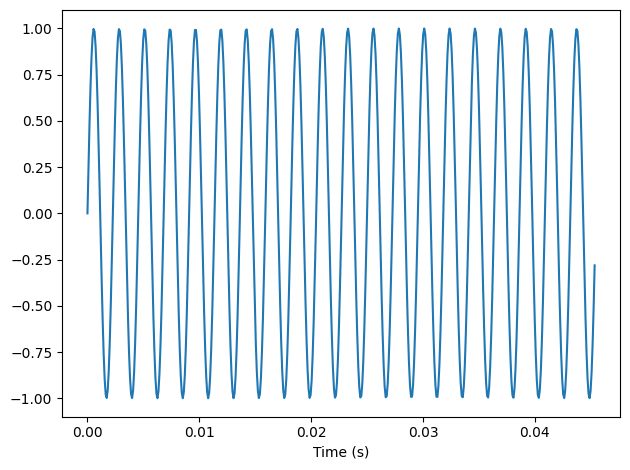

In [3]:
duration = signal.period * 20
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

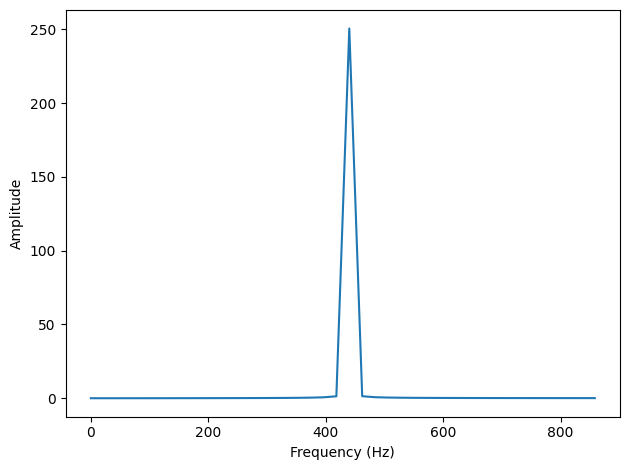

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

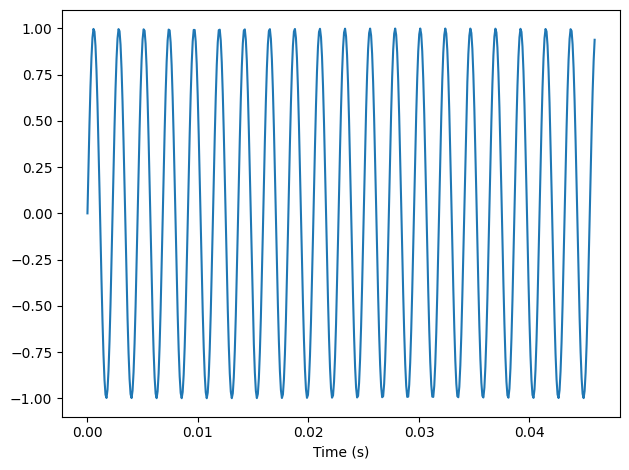

In [5]:
duration = signal.period * 20.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

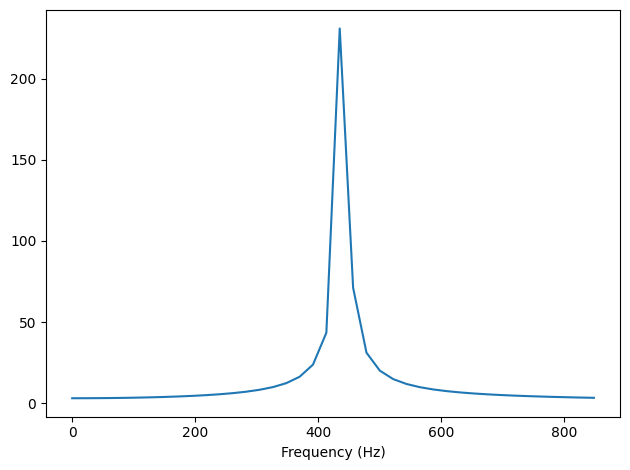

In [6]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

In [7]:
def Uelsh_Window(N):
    result = np.ones(N)
    L = N
    for n in range(N):
        result[n] = 1 - abs((n-N/2)/(L/2))**2
    return result

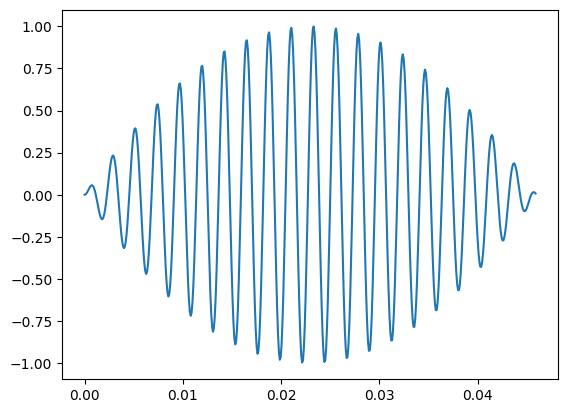

In [8]:
npoints = len(wave.ys)
win_func = Uelsh_Window(npoints)
wave_n = wave.copy()
wave_n.window(win_func)
wave_n.plot()

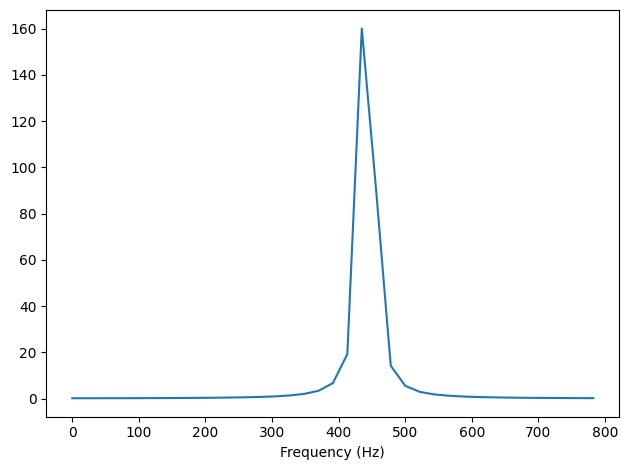

In [9]:
spectrum = wave_n.make_spectrum()
spectrum.plot(high=800)
decorate(xlabel='Frequency (Hz)')